In [54]:
import os
import json
import re
from pathlib import Path

### REMOVE API ERROR RESULTS
# paths
FOLDER_PATH = "results/prompt_default_prompt/openai"  
DPFOLDER_PATH = "combined_results/deepseek"

# Error messages to catch
ERROR_MESSAGE_STARTS = [
    "ERROR: Error code: 429 - {'error': {'message': 'You exceeded your current quota",  # Quota exceeded
    "ERROR: Request timed out.",  # Timeout
    "ERROR: Error code: 400 - {'error': {'message': 'Invalid max_tokens value",  # Invalid max_tokens
]

def should_delete(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for trial in data.get("trials", []):
                response_text = trial.get("response_text", "")
                # Check if response_text starts with any of the error patterns
                if any(response_text.startswith(error_start) for error_start in ERROR_MESSAGE_STARTS):
                    return True
    except Exception as e:
        print(f"[!] Error reading {file_path}: {e}")
    return False

def delete_matching_files(folder):
    deleted_count = 0
    for root, _, files in os.walk(folder):
        for name in files:
            if name.endswith(".json"):
                file_path = os.path.join(root, name)
                if should_delete(file_path):
                    try:
                        os.remove(file_path)
                        print(f"[✓] Deleted: {file_path}")
                        deleted_count += 1
                    except Exception as e:
                        print(f"[!] Failed to delete {file_path}: {e}")
    print(f"\nTotal files deleted: {deleted_count}")

delete_matching_files(FOLDER_PATH)
delete_matching_files(DPFOLDER_PATH)


Total files deleted: 0

Total files deleted: 0


In [63]:
### REGRADE/FORMAT FLAW ASSIGNMENT

# Paths
ORESULTS_DIR = "results/prompt_default_prompt/openai"

DRESULTS_DIR = "results/dpprompt_default_prompt/deepseek"
# Allowed characters in valid response (lowercase letters and "|")
VALID_CHARS = set("abcdefghijklmnopqrstuvwxyz|\n ")

def tokenize(text):
    """Splits text into lines, then tokens (split by '|')"""
    return [line.strip().split("|") for line in text.strip().splitlines() if line.strip()]

def is_major_flaw(response, expected_token_count):
    # Significantly too long
    too_long = len(tokenize(response)) > expected_token_count * 1.1

    # Contains invalid characters
    all_chars = set(response.lower())
    invalid_chars = all_chars - VALID_CHARS
    print(invalid_chars)
    return too_long or bool(invalid_chars)

def regrade_trial(trial):
    response_lines = tokenize(trial["response_text"])
    expected_lines = tokenize(trial["expected_response_text"])

    total = 0
    correct = 0
    seq_correct = 0

    for expected, response in zip(expected_lines, response_lines):
        if expected == response:
            seq_correct += 1
            correct += len(response)
        else:
            correct += sum(1 for a, b in zip(expected, response) if a == b)
        total += len(expected)

    num_items = len(expected_lines)
    trial["sequence_accuracy"] = seq_correct / num_items if num_items else 0
    trial["token_accuracy"] = correct / total if total else 0
    trial["major_format_flaw"] = is_major_flaw(trial["response_text"], trial["expected_token_count"])

def regrade_file(path):
    try:
        with open(path, "r", encoding="utf-8") as f:
            data = json.load(f)

        for trial in data.get("trials", []):
            regrade_trial(trial)

        with open(path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=2)

        print(f"✓ Regraded: {path}")
    except Exception as e:
        print(f"[!] Error with {path}: {e}")

def regrade_all(folder):
    for file in Path(folder).rglob("*.json"):
        regrade_file(file)



#regrade_all(ORESULTS_DIR)
regrade_all(DRESULTS_DIR)

set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_10N_10K_20250508T030330.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_12N_50K_20250508T181058.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_10N_35K_20250508T030904.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_4N_45K_20250508T173954.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_6N_15K_20250508T174209.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_6N_25K_20250508T174320.json
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_150N_1K_20250508T235209.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_4N_25K_20250508T173705.json
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_150N_2K_20250508T235312.json
se

✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_50N_20K_20250508T083929.json
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_150N_3K_20250508T235444.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_12N_15K_20250508T180006.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_4N_15K_20250508T173555.json
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_150N_1K_20250508T235222.json
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_140N_8K_20250508T234615.json
{'ي', 'ز', 'ج', 'ل', 'ن', 'ة'}
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_10N_45K_20250508T031236.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_40N_15K_20250508T045220.json
set()
set()
set()
✓ Regraded: results/dpprompt_default_prompt/deepseek/deepseek-chat_2N_15K_20250508T173111.json
set()

Loaded 5,141 trials (filtered to 1,695 cells) across 2 providers

=== deepseek ===

=== openai ===


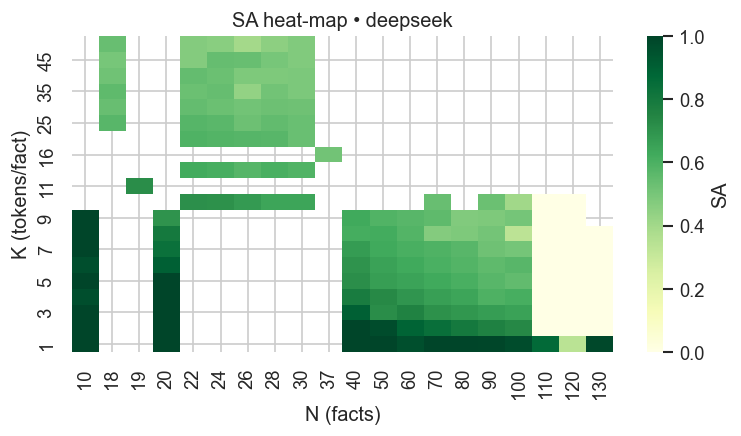

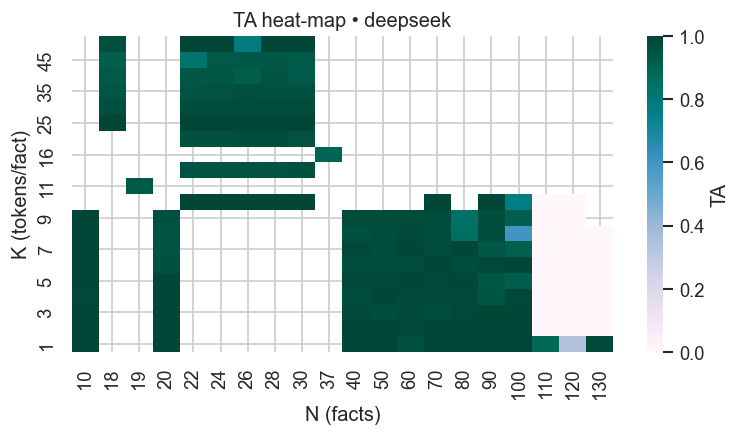

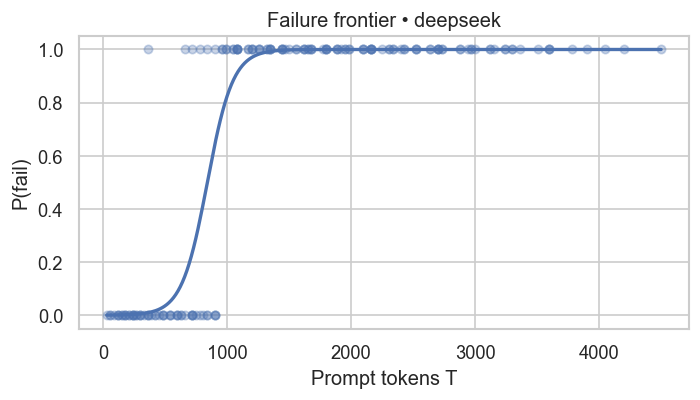

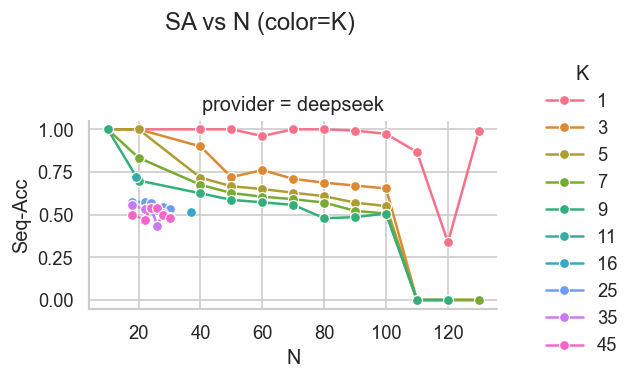

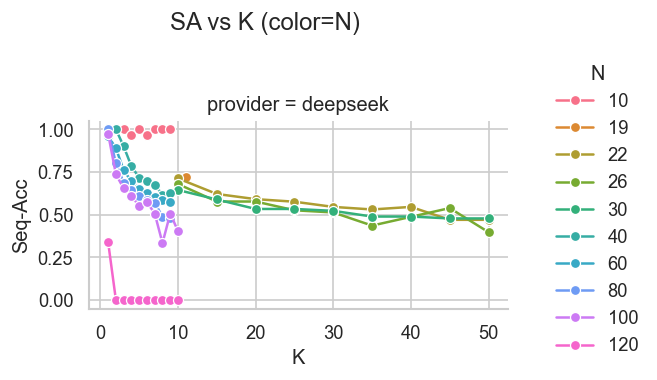

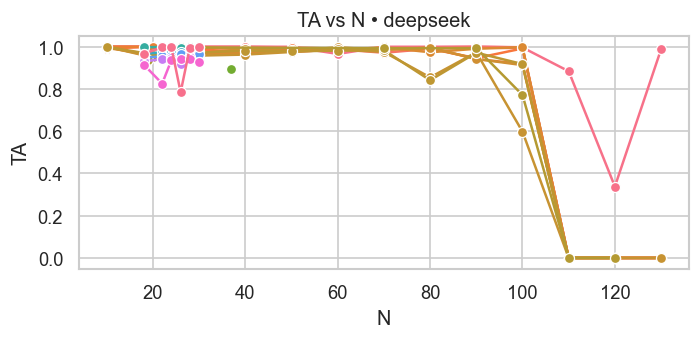

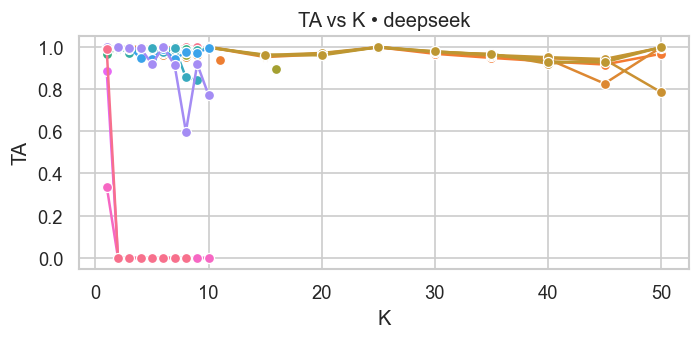

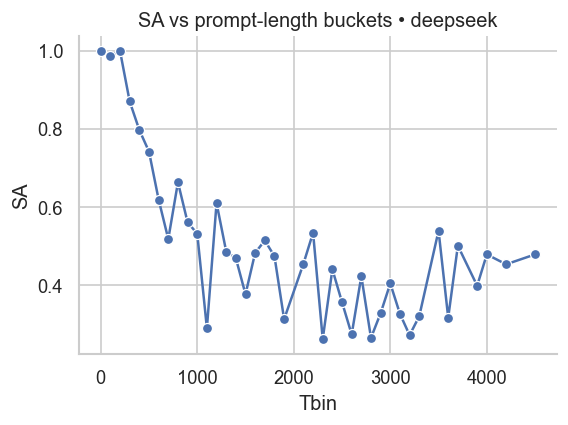

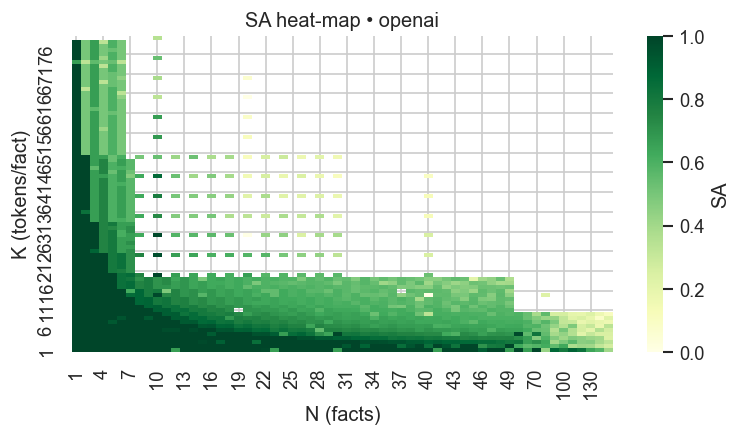

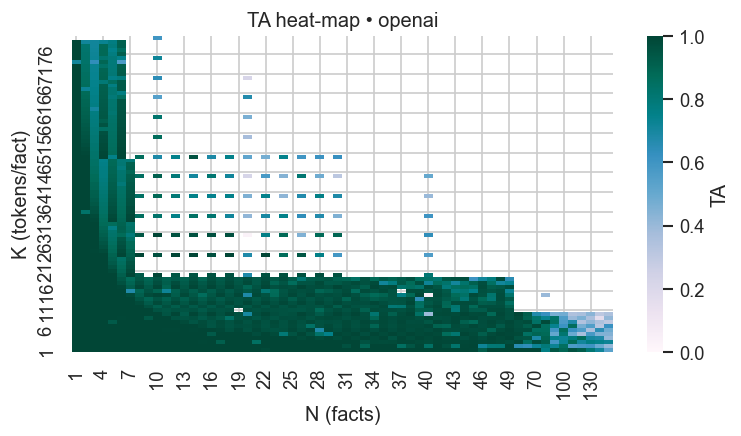

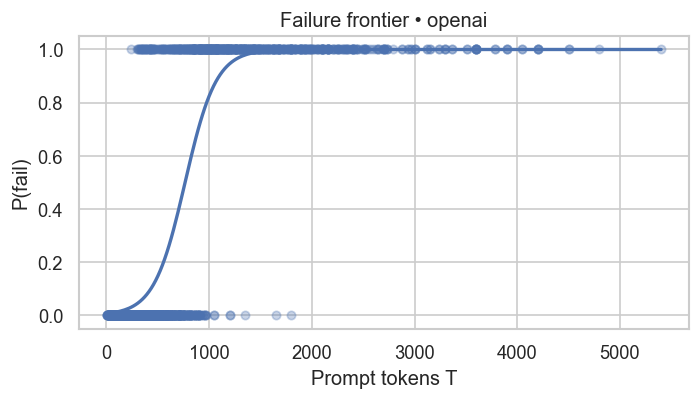

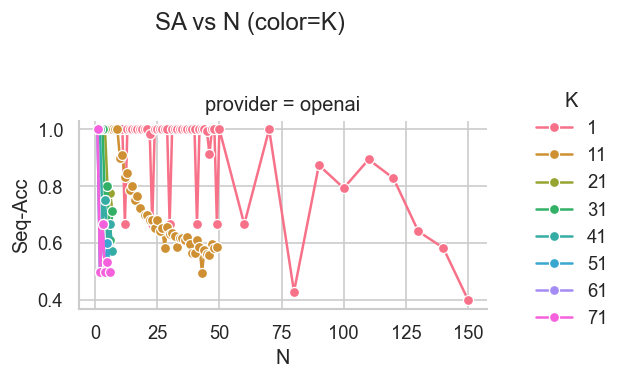

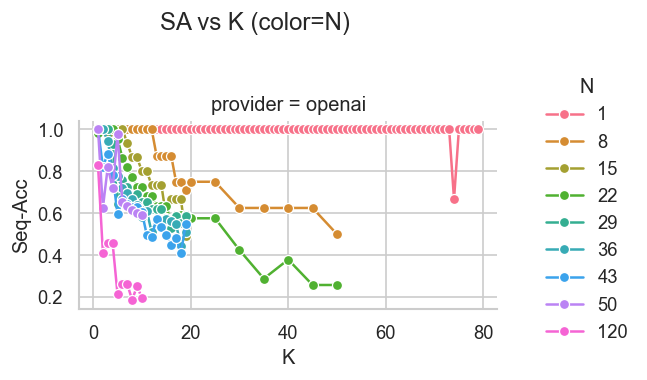

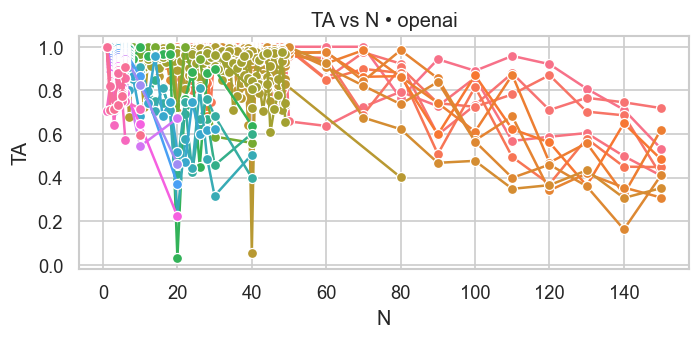

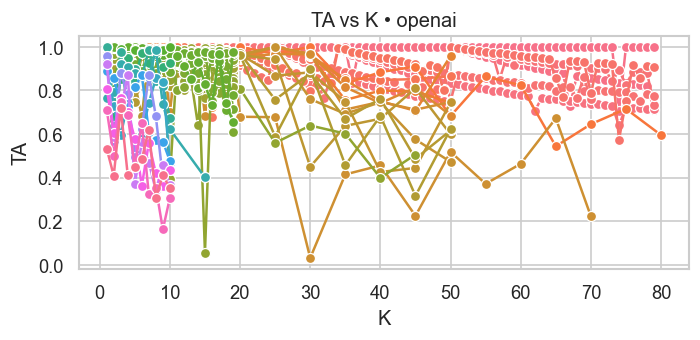

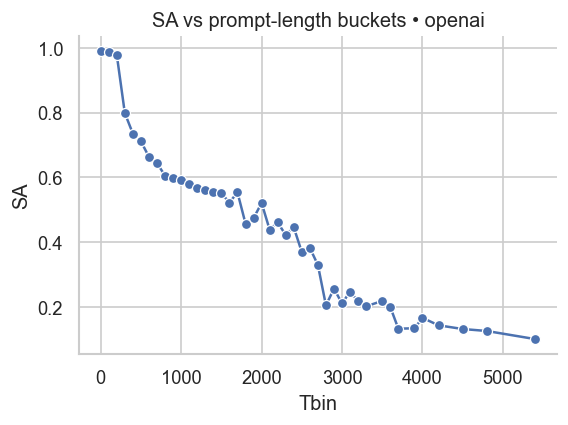

In [61]:
# ======================================================================
# Imports & CONFIG
# ======================================================================
import json, re, itertools, pathlib, warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore", category=UserWarning)
sns.set_theme(style="whitegrid"); plt.rcParams["figure.dpi"] = 120

# --- User-configurable ---
RESULT_DIRS = [                      # (provider-label, results-folder)
    ("openai",   pathlib.Path("results/prompt_default_prompt/openai")),
    ("deepseek", pathlib.Path("combined_results")),
]
SELECTED_K = None  # e.g., [2, 4, 8] or None for all K
SELECTED_N = None # e.g., [5, 10, 20] or None for all N
SA_PASS  = 0.65    # Sequence-accuracy threshold for "pass"
FFR_THR  = 0.9     # Format-flaw rate threshold for "pass"
TOK_BUCKET = 100   # Token-length bucket size
MAX_SLICE_LINES = 8 # Max lines in trend plots
# ======================================================================

# ======================================================================
# Helpers
# ======================================================================
def nk_from_stem(stem: str):
    m = re.search(r"_([0-9]+)N_([0-9]+)K", stem, re.I)
    return (int(m[1]), int(m[2])) if m else (None, None)

def read_trials(root: pathlib.Path, provider: str):
    for jf in root.rglob("*.json"):
        N, K = nk_from_stem(jf.stem)
        if N is None:
            continue
        try:
            blob = json.loads(jf.read_text())
            for t in blob["trials"]:
                yield dict(provider=provider, N=N, K=K,
                           SA=t["sequence_accuracy"],
                           TA=t["token_accuracy"],
                           FFR=int(t["major_format_flaw"]),
                           exp_tok=t.get("expected_token_count", np.nan),
                           resp_tok=t.get("response_token_count", np.nan))
        except Exception as e:
            print("skip", jf, e)


# ======================================================================
# Load and Filter Data
# ======================================================================
def load_and_filter_data():
    # Load raw data
    DF = pd.DataFrame(itertools.chain.from_iterable(
            read_trials(p, lbl) for lbl, p in RESULT_DIRS))
    if DF.empty:
        raise RuntimeError("No JSON trials found")

    # Filter by K/N if specified
    if SELECTED_K is not None:
        DF = DF[DF["K"].isin(SELECTED_K)]
    if SELECTED_N is not None:
        DF = DF[DF["N"].isin(SELECTED_N)]

    # Aggregate
    AGG = (DF.groupby(["provider","N","K"])
              .agg(SA=("SA","mean"), TA=("TA","mean"),
                   FFR=("FFR","mean"), n_trials=("SA","size"))
              .reset_index())
    AGG["T"] = 3 * AGG["N"] * AGG["K"]
    AGG["pass"] = (AGG["SA"] >= SA_PASS) & (AGG["FFR"] < FFR_THR)

    print(f"Loaded {len(DF):,} trials (filtered to {len(AGG):,} cells) "
          f"across {DF.provider.nunique()} providers")
    return DF, AGG

DF, AGG = load_and_filter_data()


# ======================================================================
# Shared plotting helpers (unchanged)
# ======================================================================
def heat(data, metric, title, cmap):
    piv = data.pivot(index="K", columns="N", values=metric)\
             .sort_index().sort_index(axis=1)
    plt.figure(figsize=(6.5,3.8))
    sns.heatmap(piv, cmap=cmap, vmin=0, vmax=1,
                cbar_kws=dict(label=metric), annot=False)
    plt.gca().invert_yaxis()
    plt.xlabel("N (facts)"); plt.ylabel("K (tokens/fact)")
    plt.title(title); plt.tight_layout()

def trend(data, vary, slice_on, max_lines=MAX_SLICE_LINES):
    sub=data.copy(); uniq=sorted(sub[slice_on].unique())
    if len(uniq)>max_lines: sub=sub[sub[slice_on].isin(uniq[::len(uniq)//max_lines])]
    g=sns.FacetGrid(sub,col="provider",hue=slice_on,sharey=False,
                    palette="husl",height=3,aspect=1.2,
                    col_wrap=sub.provider.nunique())
    g.map_dataframe(sns.lineplot,x=vary,y="SA",marker="o")
    g.add_legend(title=slice_on,bbox_to_anchor=(1.02,0.5),loc="center left")
    g.set_axis_labels(vary,"Seq-Acc")
    g.fig.suptitle(f"SA vs {vary} (color={slice_on})",y=1.05)
    plt.tight_layout()

def bucket_stats(data,width=TOK_BUCKET):
    d=data.assign(Tbin=lambda d:(d["T"]//width)*width)
    return (d.groupby(["provider","Tbin"])
              .agg(SA=("SA","mean"),TA=("TA","mean"),
                   FFR=("FFR","mean"),cells=("SA","size"))
              .reset_index())

def logistic_frontier(df_sub,thr=1.0,metric="SA"):
    fail=(df_sub[metric]<thr)|(df_sub["FFR"]>=FFR_THR)
    X=df_sub[["T"]].values; y=fail.astype(int).values
    lr=LogisticRegression(solver="lbfgs").fit(X,y)
    xx=np.linspace(X.min(),X.max(),300).reshape(-1,1)
    return xx.ravel(), lr.predict_proba(xx)[:,1]


# ======================================================================
# per-model analytics (unchanged)
# ======================================================================
def run_all_per_model(agg):
    for prov, sub in agg.groupby("provider"):
        print(f"\n=== {prov} ===")
        heat(sub,"SA",f"SA heat-map • {prov}","YlGn")
        heat(sub,"TA",f"TA heat-map • {prov}","PuBuGn")

        # failure frontier
        X=sub[["T"]]; y=(~sub["pass"]).astype(int)
        lr=LogisticRegression(solver="lbfgs").fit(X,y)
        xx=np.linspace(X.min(),X.max(),250).reshape(-1,1)
        plt.figure(figsize=(6,3.5))
        plt.scatter(X,y,s=25,alpha=.3)
        plt.plot(xx,lr.predict_proba(xx)[:,1],lw=2)
        plt.xlabel("Prompt tokens T"); plt.ylabel("P(fail)")
        plt.title(f"Failure frontier • {prov}"); plt.tight_layout()

        # trends
        trend(sub,"N","K"); trend(sub,"K","N")

        # token-accuracy versions
        for vary,slice_on in [("N","K"),("K","N")]:
            plt.figure(figsize=(6,3))
            sns.lineplot(data=sub,x=vary,y="TA",hue=slice_on,marker="o",
                         palette="husl",legend=False)
            plt.title(f"TA vs {vary} • {prov}")
            plt.tight_layout()

        # buckets + scatter
        b=bucket_stats(sub)
        sns.relplot(data=b,x="Tbin",y="SA",kind="line",marker="o",
                    height=3.5,aspect=1.4)
        plt.title(f"SA vs prompt-length buckets • {prov}")
        plt

run_all_per_model(AGG)

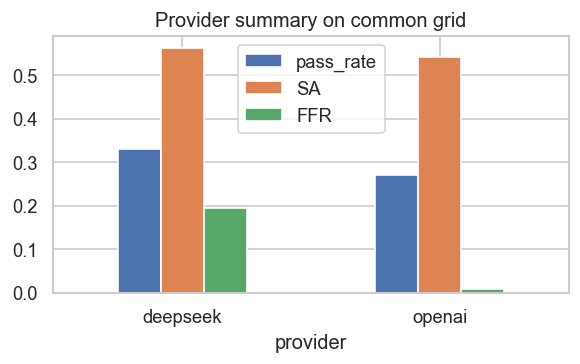

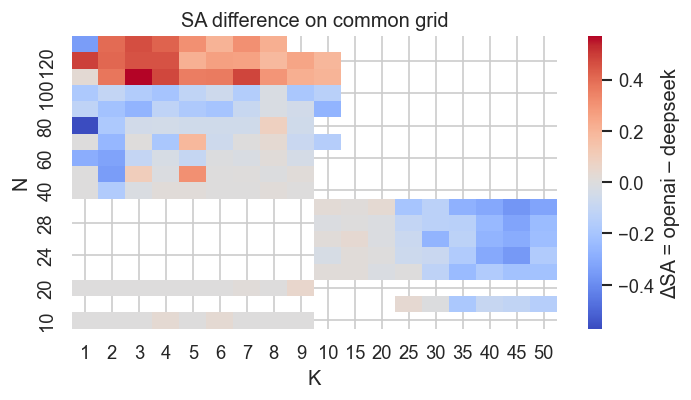

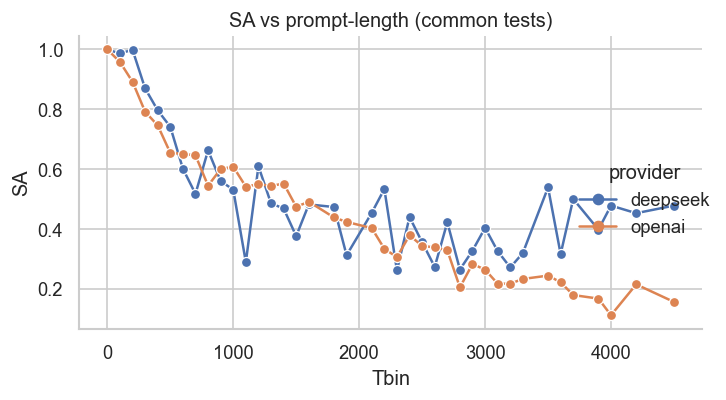

In [62]:
"""
Stage 2  (cross-model):  run_model_comparison(df)
  * grid filter ⇒ only (N,K) present in **every** provider
  * summary bar-chart of pass-rate, mean SA, mean flaw-rate
  * difference heat-map   ΔSA = SA(modelA) – SA(modelB)
  * bucketed prompt-length comparison lines
  """
# ======================================================================
#  provider comparison on common grid
# ======================================================================
def run_model_comparison(agg):
    # find common (N,K)
    def pair_set(label): return set(agg.loc[agg.provider==label,["N","K"]]
                                         .itertuples(index=False,name=None))
    common=set.intersection(*[pair_set(lbl) for lbl,_ in RESULT_DIRS])
    comp=agg[agg.apply(lambda r:(r.N,r.K) in common,axis=1)]
    if comp.empty:
        print("No common experiments for comparison"); return

    # summary stats bar
    summ=(comp.groupby("provider")
              .agg(pass_rate=("pass","mean"),
                   SA=("SA","mean"), FFR=("FFR","mean"))
              .assign(pass_rate=lambda d:d.pass_rate.round(3)))
    summ.plot(kind="bar",figsize=(5,3.2),rot=0)
    plt.title("Provider summary on common grid")
    plt.tight_layout()

    # ΔSA heat-map (first vs second provider)
    provA,provB=[lbl for lbl,_ in RESULT_DIRS][:2]
    a=comp[comp.provider==provA].set_index(["N","K"])["SA"]
    b=comp[comp.provider==provB].set_index(["N","K"])["SA"]
    diff=(a-b).unstack()                  # ΔSA = A – B
    plt.figure(figsize=(6,3.5))
    sns.heatmap(diff,center=0,cmap="coolwarm",
                cbar_kws=dict(label=f"ΔSA = {provA} – {provB}"))
    plt.gca().invert_yaxis()
    plt.title("SA difference on common grid"); plt.tight_layout()

    # prompt-length comparison lines
    bucket=bucket_stats(comp)
    sns.relplot(data=bucket,x="Tbin",y="SA",hue="provider",
                kind="line",marker="o",height=3.5,aspect=1.4)
    plt.title("SA vs prompt-length (common tests)"); plt.tight_layout()

run_model_comparison(AGG)


Loaded 4,052 trials from 1 provider folders


/Users/marcobetti/Desktop/AGI2/FTAAT/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


≈50 % strict-fail at T ≈ 273 tokens


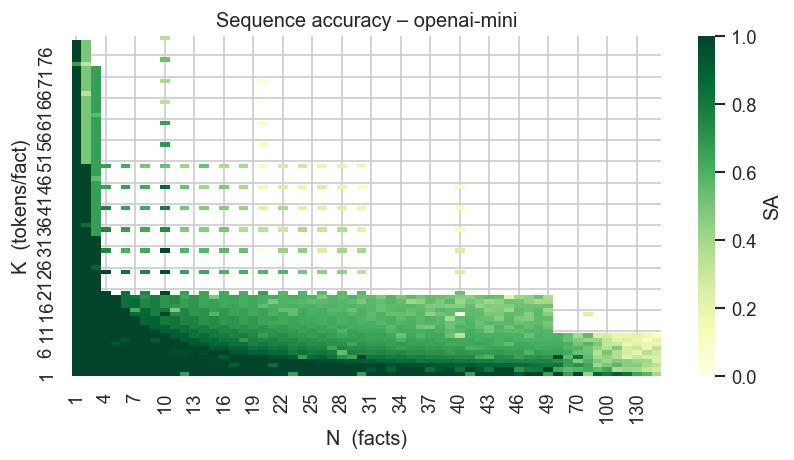

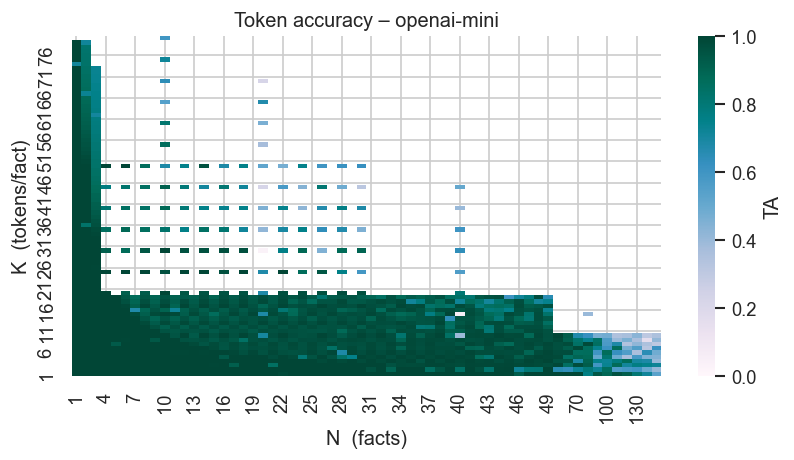

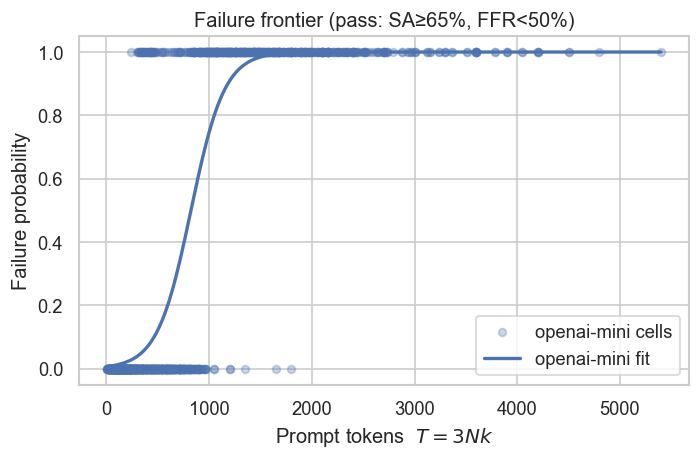

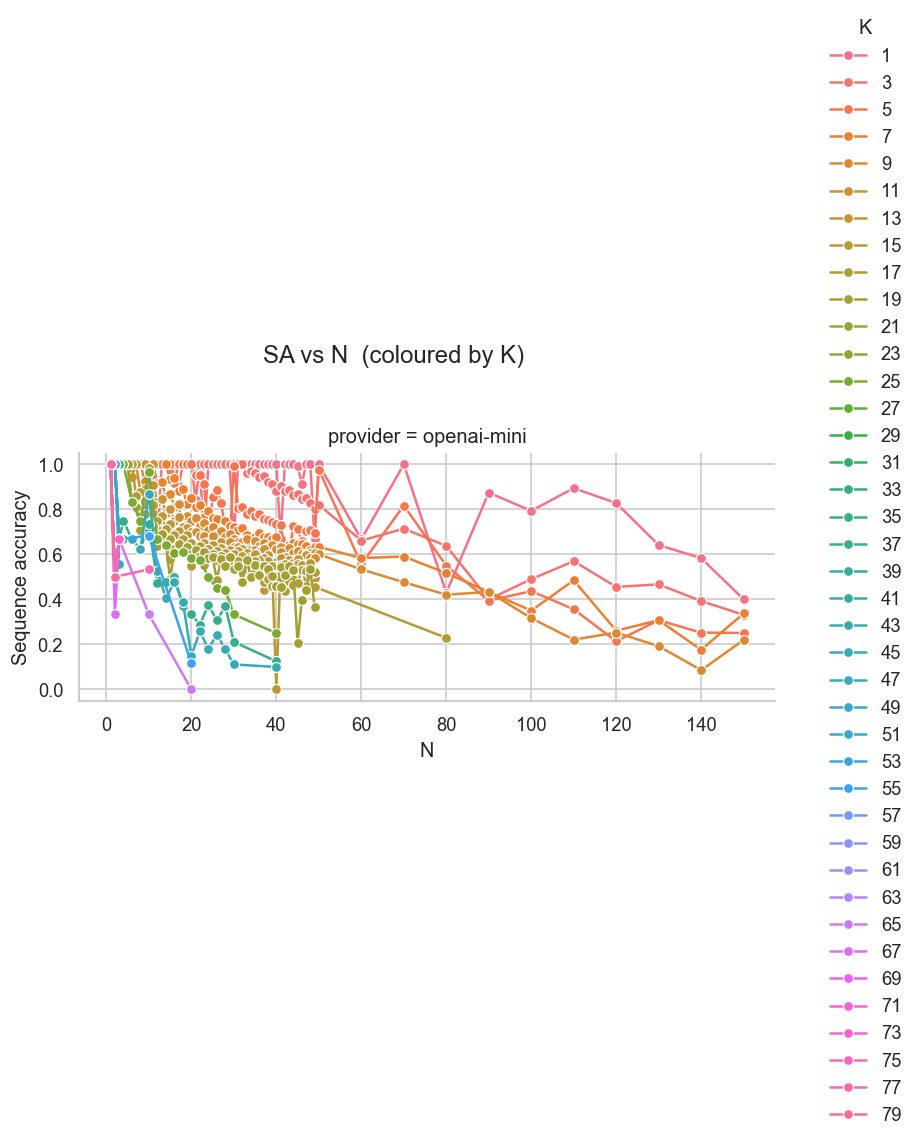

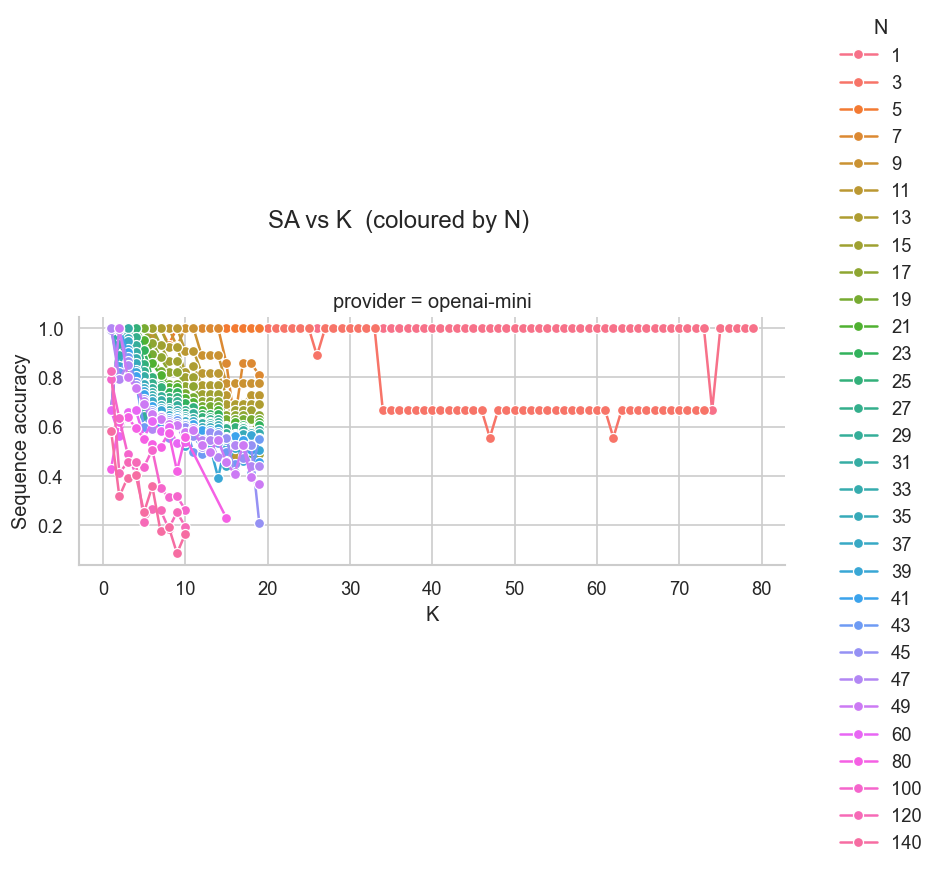

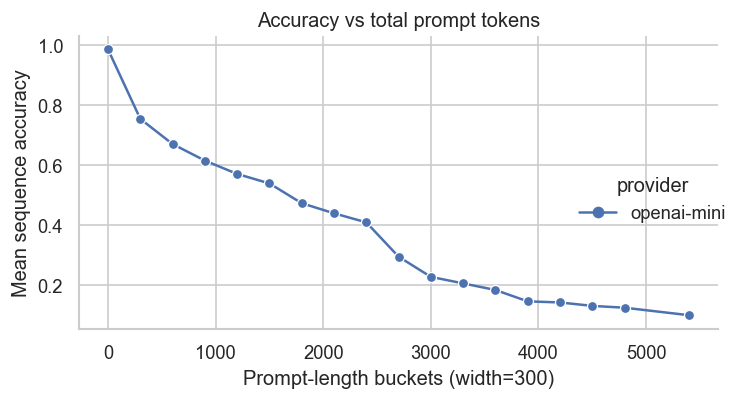

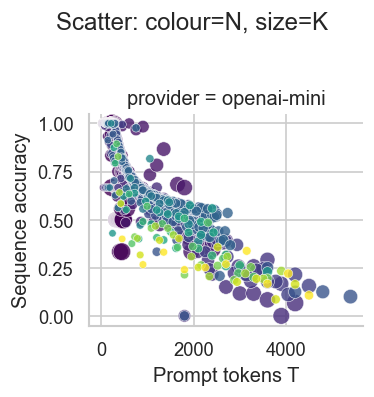

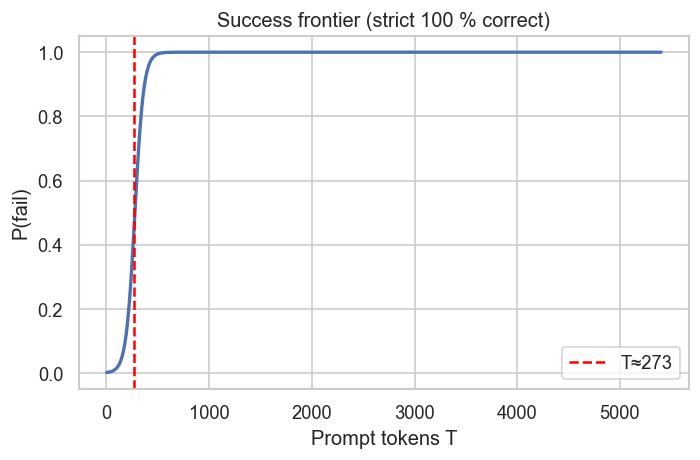

In [30]:
"""
viz_failure_frontier.py
-------------------------------------------------------------
Load JSON trial results from multiple providers and produce
a suite of visualisations + an optional “success-frontier”
statistical curve.

Drop into a notebook or run as `python viz_failure_frontier.py`
inside an environment that has seaborn, sklearn, pandas, numpy.
"""

# ======================================================================
# 0. Imports & CONFIG
# ======================================================================
import json, re, itertools, pathlib, os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# ---------------- USER-KNOBS ------------------------------------------
RESULT_DIRS = [                               # provider-label, results-folder
    ("openai-mini", pathlib.Path("results/prompt_default_prompt/openai")),
    #("deepseek",    pathlib.Path("results/dpprompt_default_prompt/deepseek")),
]
MATCH_ONLY_COMMON   = False       # keep only (N,K) that every provider has
SA_PASS             = 0.65        # default “pass” seq-accuracy threshold
FFR_THR             = 0.50        # format-flaw threshold
TOKEN_BUCKET_WIDTH  = 300         # prompt-length bucket size
MAX_LINES_PER_SLICE = 30         # limit legend clutter in trend plots
# ======================================================================



# ======================================================================
# 1. Helpers – parsing & loading
# ======================================================================
def parse_nk(stem: str):
    """Return integers (N,K) parsed from “…_10N_5K_…” or (None,None)."""
    m = re.search(r"_([0-9]+)N_([0-9]+)K", stem, re.I)
    return (int(m[1]), int(m[2])) if m else (None, None)


def iter_trials(root: pathlib.Path, provider: str):
    """Yield trial-dicts for every JSON under `root` (recursive)."""
    for jf in root.rglob("*.json"):
        N, K = parse_nk(jf.stem)
        if N is None:
            continue
        try:
            blob = json.loads(jf.read_text())
            for t in blob["trials"]:
                yield dict(provider=provider,
                           N=N, K=K,
                           SA=t["sequence_accuracy"],
                           TA=t["token_accuracy"],
                           FFR=int(t["major_format_flaw"]),
                           exp_tok=t.get("expected_token_count", np.nan),
                           resp_tok=t.get("response_token_count", np.nan))
        except Exception as e:
            print("⚠️  skip", jf, e)


# ======================================================================
# 2. Load data
# ======================================================================
df = pd.DataFrame(itertools.chain.from_iterable(
        iter_trials(p, lbl) for lbl, p in RESULT_DIRS))
if df.empty:
    raise RuntimeError("❌ No JSON files found in RESULT_DIRS")

print(f"Loaded {len(df):,} trials "
      f"from {df.provider.nunique()} provider folders")

# ---------- keep only (N,K) present in every provider -----------------
if MATCH_ONLY_COMMON:
    def pairs(sub, label):
        return set(sub.loc[sub.provider == label, ["N", "K"]]
                     .itertuples(index=False, name=None))
    common_pairs = set.intersection(*[pairs(df, lbl) for lbl, _ in RESULT_DIRS])
    df = df[df.apply(lambda r: (r.N, r.K) in common_pairs, axis=1)]
    print(f"Common grid size: {len(common_pairs)} (N,K) cells")

# ======================================================================
# 3. Aggregate per cell  (provider, N, K)
# ======================================================================
agg = (df.groupby(["provider", "N", "K"])
          .agg(SA=("SA", "mean"),
               TA=("TA", "mean"),
               FFR=("FFR", "mean"),
               n_trials=("SA", "size"))
          .reset_index())

agg["T"] = 3 * agg["N"] * agg["K"]   # prompt-token length
agg["pass"] = (agg["SA"] >= SA_PASS) & (agg["FFR"] < FFR_THR)



# ======================================================================
# 4. Visual helpers
# ======================================================================
def heatmap_clean(data, metric, title, cmap, vmin=0, vmax=1):
    piv = (data.pivot(index="K", columns="N", values=metric)
               .sort_index().sort_index(axis=1))
    plt.figure(figsize=(7, 4))
    sns.heatmap(piv, cmap=cmap, vmin=vmin, vmax=vmax,
                cbar_kws=dict(label=metric), annot=False)
    plt.gca().invert_yaxis()          # smaller K at bottom
    plt.title(title)
    plt.xlabel("N  (facts)")
    plt.ylabel("K  (tokens/fact)")
    plt.tight_layout()


def trend_slice(data, vary, slice_on, max_lines=MAX_LINES_PER_SLICE,
                figsize=(6, 3.5)):
    """
    vary:       'N' or 'K' – x-axis
    slice_on:   the other dim – line-colour
    """
    sub = data.copy()
    uniq = sorted(sub[slice_on].unique())
    if len(uniq) > max_lines:
        step = max(1, len(uniq) // max_lines)
        sub = sub[sub[slice_on].isin(uniq[::step])]

    g = sns.FacetGrid(sub, col="provider", hue=slice_on,
                      height=figsize[1], aspect=figsize[0]/figsize[1],
                      palette="husl", sharey=False,
                      col_wrap=len(RESULT_DIRS))
    g.map_dataframe(sns.lineplot, x=vary, y="SA", marker="o")
    g.add_legend(title=slice_on, bbox_to_anchor=(1.02, 0.5),
                 loc="center left")
    g.set_axis_labels(vary, "Sequence accuracy")
    g.fig.suptitle(f"SA vs {vary}  (coloured by {slice_on})", y=1.04)
    plt.tight_layout()


def length_bucket_stats(data, width=TOKEN_BUCKET_WIDTH):
    d = data.assign(Tbin=lambda d: (d["T"] // width) * width)
    return (d.groupby(["provider", "Tbin"])
              .agg(SA=("SA", "mean"),
                   TA=("TA", "mean"),
                   FFR=("FFR", "mean"),
                   cells=("SA", "size"))
              .reset_index())


def success_frontier(df_cells, metric="SA",
                     pass_threshold=1.0, conf=0.95,
                     solver="lbfgs"):
    """
    Fit logistic curve P(fail|T) for all providers combined.
    'fail' = metric < pass_threshold or FFR >= FFR_THR.
    Returns (xx, yy, token@50%fail).
    """
    fail = (df_cells[metric] < pass_threshold) | (df_cells["FFR"] >= FFR_THR)
    X = df_cells[["T"]].values
    y = fail.astype(int).values
    clf = LogisticRegression(solver=solver).fit(X, y)

    xx = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
    yy = clf.predict_proba(xx)[:, 1]

    idx50 = np.argmin(np.abs(yy - 0.5))
    tok50 = int(xx[idx50][0])
    return xx.ravel(), yy, tok50


# ======================================================================
# 5. Generate visualisations
# ======================================================================
# 5-A heat-maps
for prov, sub in agg.groupby("provider"):
    heatmap_clean(sub, "SA",  f"Sequence accuracy – {prov}", "YlGn")
    heatmap_clean(sub, "TA",  f"Token accuracy – {prov}",    "PuBuGn")
    #heatmap_clean(sub, "FFR", f"Format-flaw rate – {prov}",  "OrRd_r")

# 5-B failure frontier vs prompt length
plt.figure(figsize=(6, 4))
for prov, sub in agg.groupby("provider"):
    X = sub[["T"]]; y = (~sub["pass"]).astype(int)
    model = LogisticRegression(solver="lbfgs").fit(X, y)
    xx = np.linspace(X.min(), X.max(), 250).reshape(-1, 1)
    plt.scatter(X, y, s=22, alpha=.3, label=f"{prov} cells")
    plt.plot(xx, model.predict_proba(xx)[:, 1], lw=2, label=f"{prov} fit")
plt.xlabel("Prompt tokens  $T=3Nk$")
plt.ylabel("Failure probability")
plt.title(f"Failure frontier (pass: SA≥{SA_PASS:.0%}, FFR<{FFR_THR:.0%})")
plt.legend(); plt.tight_layout()

# 5-C trend slices
trend_slice(agg, vary="N", slice_on="K")
trend_slice(agg, vary="K", slice_on="N")

# 5-D bucketed length stats & scatter
bucket = length_bucket_stats(agg, width=TOKEN_BUCKET_WIDTH)
sns.relplot(data=bucket, x="Tbin", y="SA", hue="provider",
            kind="line", marker="o", height=3.5, aspect=1.4)
plt.xlabel(f"Prompt-length buckets (width={TOKEN_BUCKET_WIDTH})")
plt.ylabel("Mean sequence accuracy")
plt.title("Accuracy vs total prompt tokens")
plt.tight_layout()

g = sns.FacetGrid(agg, col="provider", height=3.2, sharey=False)
g.map_dataframe(sns.scatterplot, x="T", y="SA",
                hue="N", size="K", sizes=(20, 120),
                palette="viridis", alpha=.8, legend=False)
g.set_axis_labels("Prompt tokens T", "Sequence accuracy")
g.fig.suptitle("Scatter: colour=N, size=K", y=1.03)
plt.tight_layout()

# 5-E strict success frontier  (100 % correct)
xx, yy, tok50 = success_frontier(agg, metric="SA", pass_threshold=1.0)
plt.figure(figsize=(6,4))
plt.plot(xx, yy, lw=2)
plt.axvline(tok50, ls="--", c="red", label=f"T≈{tok50}")
plt.xlabel("Prompt tokens T"); plt.ylabel("P(fail)")
plt.title("Success frontier (strict 100 % correct)")
plt.legend(); plt.tight_layout()

print(f"≈50 % strict-fail at T ≈ {tok50} tokens")

plt.show()


Loaded 5,337 trials from 2 provider folders
Common grid size: 228 (N,K) cells
≈50 % strict-fail at T ≈ 332 tokens


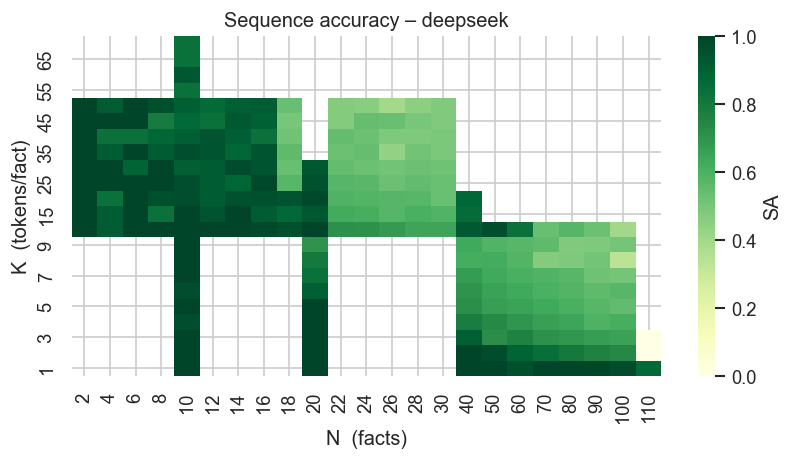

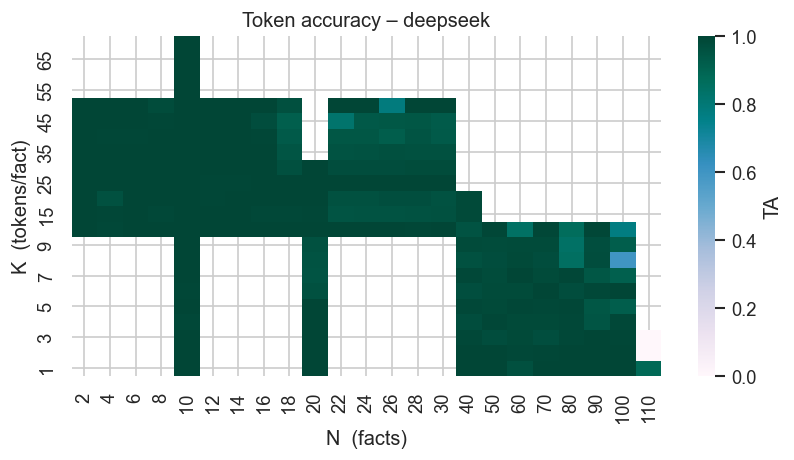

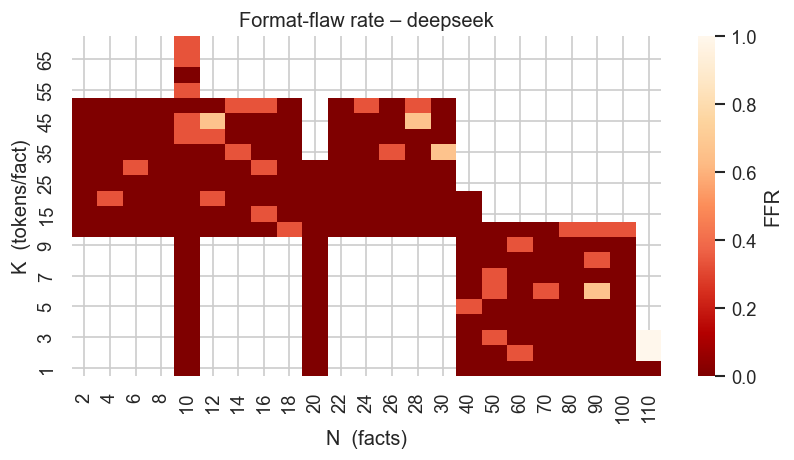

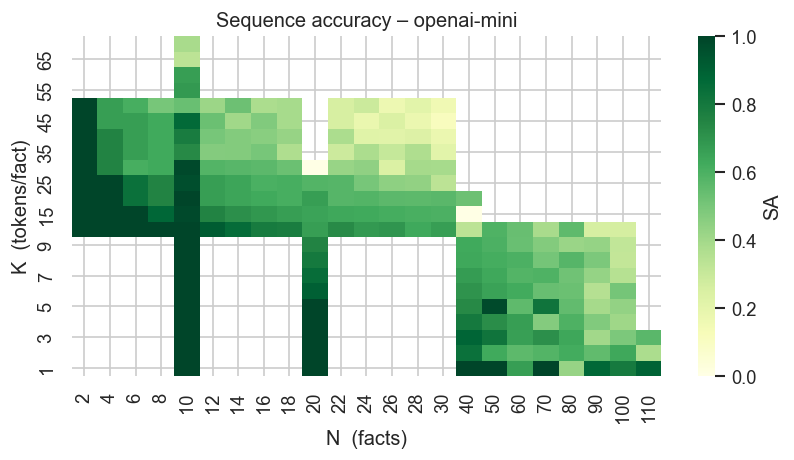

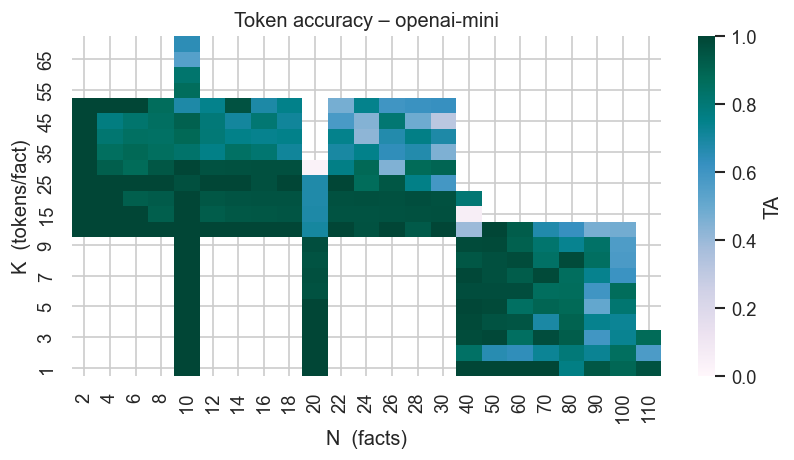

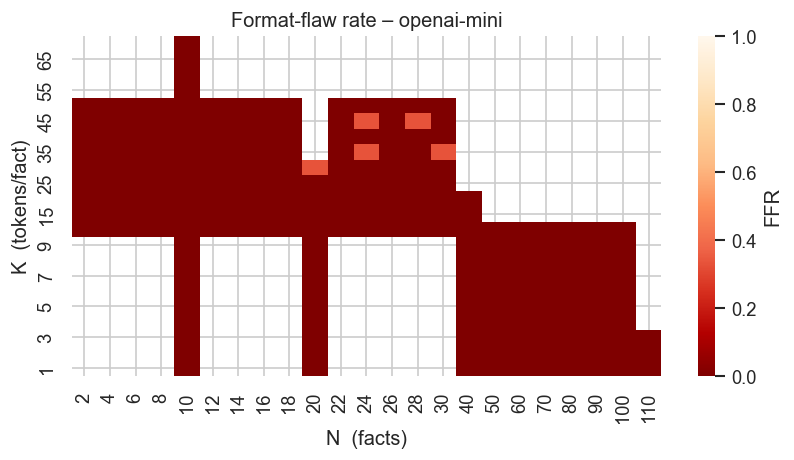

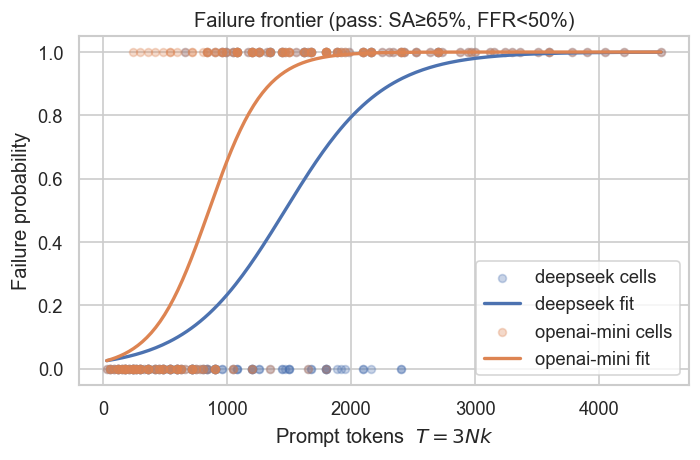

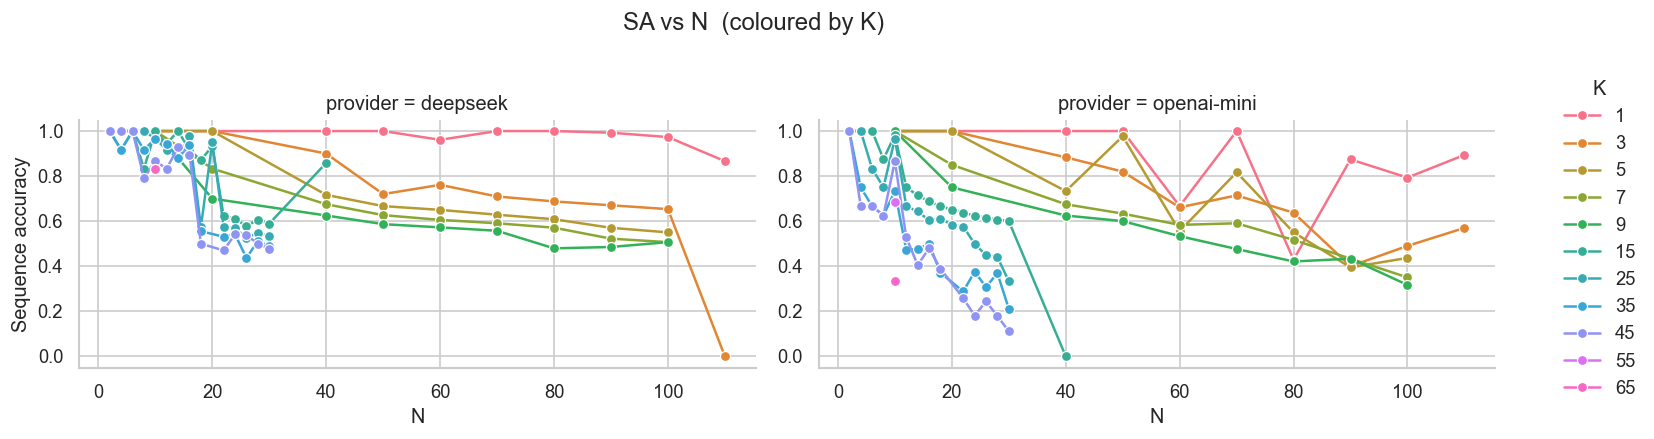

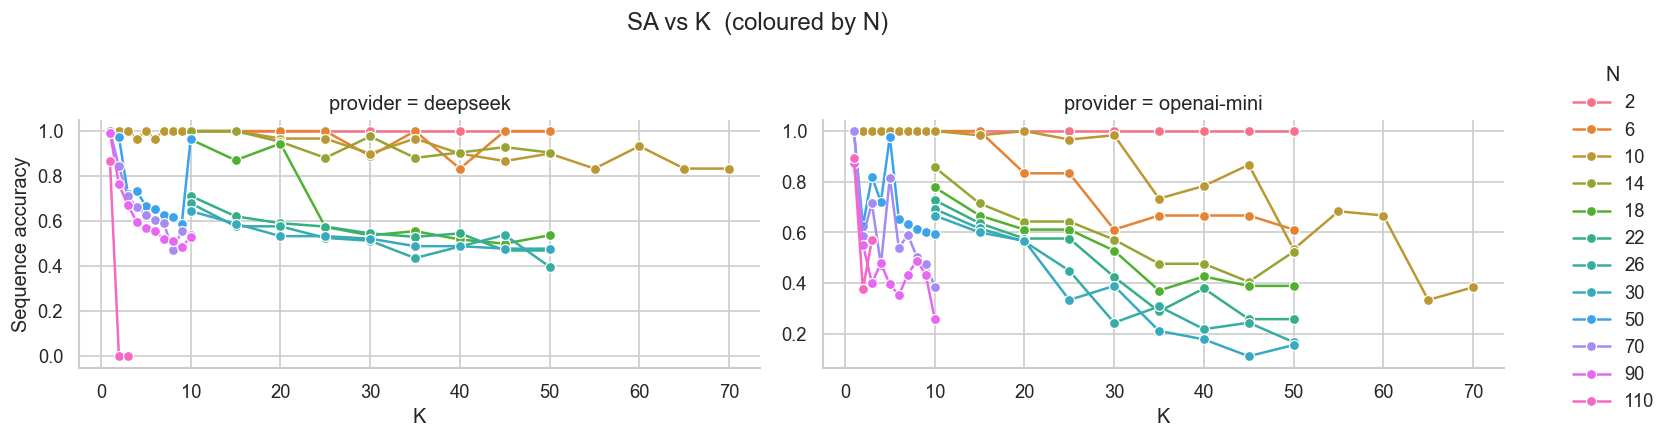

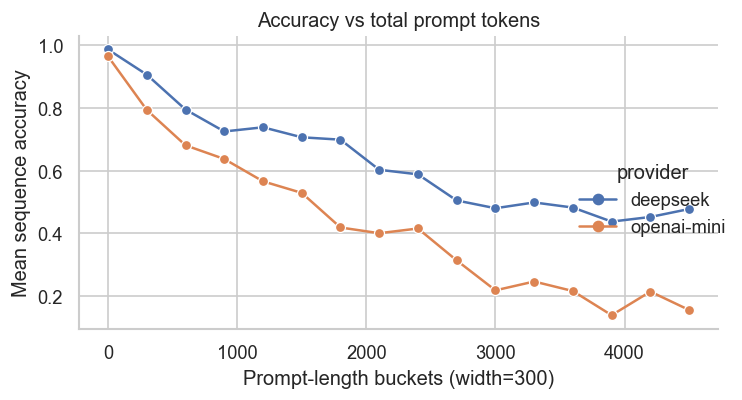

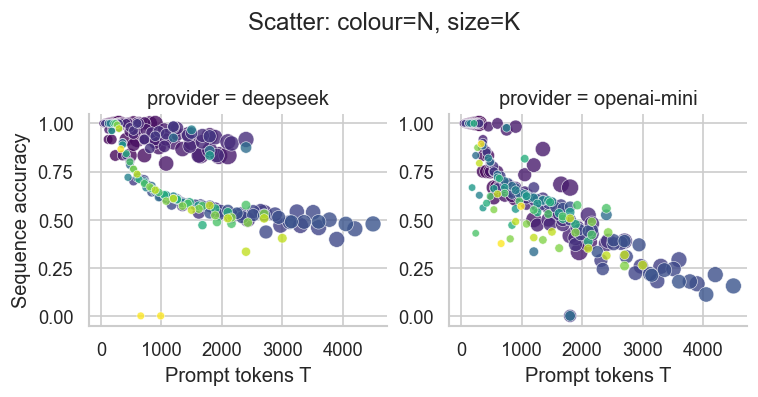

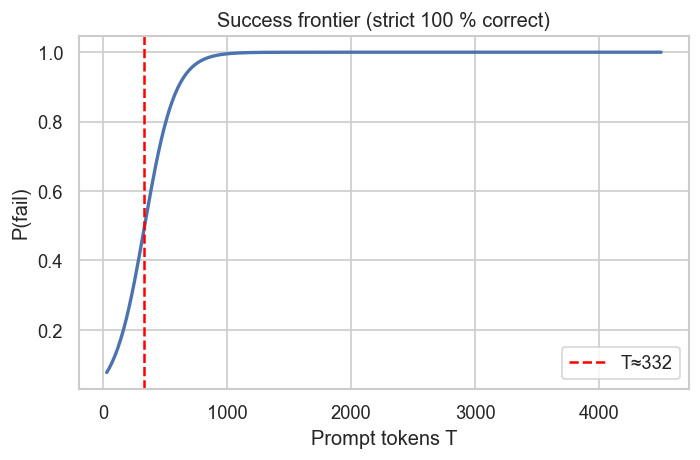

In [41]:
"""
viz_failure_frontier.py
-------------------------------------------------------------
Load JSON trial results from multiple providers and produce
a suite of visualisations + an optional “success-frontier”
statistical curve.

Drop into a notebook or run as `python viz_failure_frontier.py`
inside an environment that has seaborn, sklearn, pandas, numpy.
"""

# ======================================================================
# 0. Imports & CONFIG
# ======================================================================
import json, re, itertools, pathlib, os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# ---------------- USER-KNOBS ------------------------------------------
RESULT_DIRS = [                               # provider-label, results-folder
    ("openai-mini", pathlib.Path("results/prompt_default_prompt/openai")),
    ("deepseek",    pathlib.Path("results/dpprompt_default_prompt/deepseek")),
]
MATCH_ONLY_COMMON   = True        # keep only (N,K) that every provider has
SA_PASS             = 0.65        # default “pass” seq-accuracy threshold
FFR_THR             = 0.50        # format-flaw threshold
TOKEN_BUCKET_WIDTH  = 300         # prompt-length bucket size
MAX_LINES_PER_SLICE = 8           # limit legend clutter in trend plots
# ======================================================================



# ======================================================================
# 1. Helpers – parsing & loading
# ======================================================================
def parse_nk(stem: str):
    """Return integers (N,K) parsed from “…_10N_5K_…” or (None,None)."""
    m = re.search(r"_([0-9]+)N_([0-9]+)K", stem, re.I)
    return (int(m[1]), int(m[2])) if m else (None, None)


def iter_trials(root: pathlib.Path, provider: str):
    """Yield trial-dicts for every JSON under `root` (recursive)."""
    for jf in root.rglob("*.json"):
        N, K = parse_nk(jf.stem)
        if N is None:
            continue
        try:
            blob = json.loads(jf.read_text())
            for t in blob["trials"]:
                yield dict(provider=provider,
                           N=N, K=K,
                           SA=t["sequence_accuracy"],
                           TA=t["token_accuracy"],
                           FFR=int(t["major_format_flaw"]),
                           exp_tok=t.get("expected_token_count", np.nan),
                           resp_tok=t.get("response_token_count", np.nan))
        except Exception as e:
            print("⚠️  skip", jf, e)


# ======================================================================
# 2. Load data
# ======================================================================
df = pd.DataFrame(itertools.chain.from_iterable(
        iter_trials(p, lbl) for lbl, p in RESULT_DIRS))
if df.empty:
    raise RuntimeError("❌ No JSON files found in RESULT_DIRS")

print(f"Loaded {len(df):,} trials "
      f"from {df.provider.nunique()} provider folders")

# ---------- keep only (N,K) present in every provider -----------------
if MATCH_ONLY_COMMON:
    def pairs(sub, label):
        return set(sub.loc[sub.provider == label, ["N", "K"]]
                     .itertuples(index=False, name=None))
    common_pairs = set.intersection(*[pairs(df, lbl) for lbl, _ in RESULT_DIRS])
    df = df[df.apply(lambda r: (r.N, r.K) in common_pairs, axis=1)]
    print(f"Common grid size: {len(common_pairs)} (N,K) cells")

# ======================================================================
# 3. Aggregate per cell  (provider, N, K)
# ======================================================================
agg = (df.groupby(["provider", "N", "K"])
          .agg(SA=("SA", "mean"),
               TA=("TA", "mean"),
               FFR=("FFR", "mean"),
               n_trials=("SA", "size"))
          .reset_index())

agg["T"] = 3 * agg["N"] * agg["K"]   # prompt-token length
agg["pass"] = (agg["SA"] >= SA_PASS) & (agg["FFR"] < FFR_THR)



# ======================================================================
# 4. Visual helpers
# ======================================================================
def heatmap_clean(data, metric, title, cmap, vmin=0, vmax=1):
    piv = (data.pivot(index="K", columns="N", values=metric)
               .sort_index().sort_index(axis=1))
    plt.figure(figsize=(7, 4))
    sns.heatmap(piv, cmap=cmap, vmin=vmin, vmax=vmax,
                cbar_kws=dict(label=metric), annot=False)
    plt.gca().invert_yaxis()          # smaller K at bottom
    plt.title(title)
    plt.xlabel("N  (facts)")
    plt.ylabel("K  (tokens/fact)")
    plt.tight_layout()


def trend_slice(data, vary, slice_on, max_lines=MAX_LINES_PER_SLICE,
                figsize=(6, 3.5)):
    """
    vary:       'N' or 'K' – x-axis
    slice_on:   the other dim – line-colour
    """
    sub = data.copy()
    uniq = sorted(sub[slice_on].unique())
    if len(uniq) > max_lines:
        step = max(1, len(uniq) // max_lines)
        sub = sub[sub[slice_on].isin(uniq[::step])]

    g = sns.FacetGrid(sub, col="provider", hue=slice_on,
                      height=figsize[1], aspect=figsize[0]/figsize[1],
                      palette="husl", sharey=False,
                      col_wrap=len(RESULT_DIRS))
    g.map_dataframe(sns.lineplot, x=vary, y="SA", marker="o")
    g.add_legend(title=slice_on, bbox_to_anchor=(1.02, 0.5),
                 loc="center left")
    g.set_axis_labels(vary, "Sequence accuracy")
    g.fig.suptitle(f"SA vs {vary}  (coloured by {slice_on})", y=1.04)
    plt.tight_layout()


def length_bucket_stats(data, width=TOKEN_BUCKET_WIDTH):
    d = data.assign(Tbin=lambda d: (d["T"] // width) * width)
    return (d.groupby(["provider", "Tbin"])
              .agg(SA=("SA", "mean"),
                   TA=("TA", "mean"),
                   FFR=("FFR", "mean"),
                   cells=("SA", "size"))
              .reset_index())


def success_frontier(df_cells, metric="SA",
                     pass_threshold=1.0, conf=0.95,
                     solver="lbfgs"):
    """
    Fit logistic curve P(fail|T) for all providers combined.
    'fail' = metric < pass_threshold or FFR >= FFR_THR.
    Returns (xx, yy, token@50%fail).
    """
    fail = (df_cells[metric] < pass_threshold) | (df_cells["FFR"] >= FFR_THR)
    X = df_cells[["T"]].values
    y = fail.astype(int).values
    clf = LogisticRegression(solver=solver).fit(X, y)

    xx = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
    yy = clf.predict_proba(xx)[:, 1]

    idx50 = np.argmin(np.abs(yy - 0.5))
    tok50 = int(xx[idx50][0])
    return xx.ravel(), yy, tok50


# ======================================================================
# 5. Generate visualisations
# ======================================================================
# 5-A heat-maps
for prov, sub in agg.groupby("provider"):
    heatmap_clean(sub, "SA",  f"Sequence accuracy – {prov}", "YlGn")
    heatmap_clean(sub, "TA",  f"Token accuracy – {prov}",    "PuBuGn")
    heatmap_clean(sub, "FFR", f"Format-flaw rate – {prov}",  "OrRd_r")

# 5-B failure frontier vs prompt length
plt.figure(figsize=(6, 4))
for prov, sub in agg.groupby("provider"):
    X = sub[["T"]]; y = (~sub["pass"]).astype(int)
    model = LogisticRegression(solver="lbfgs").fit(X, y)
    xx = np.linspace(X.min(), X.max(), 250).reshape(-1, 1)
    plt.scatter(X, y, s=22, alpha=.3, label=f"{prov} cells")
    plt.plot(xx, model.predict_proba(xx)[:, 1], lw=2, label=f"{prov} fit")
plt.xlabel("Prompt tokens  $T=3Nk$")
plt.ylabel("Failure probability")
plt.title(f"Failure frontier (pass: SA≥{SA_PASS:.0%}, FFR<{FFR_THR:.0%})")
plt.legend(); plt.tight_layout()

# 5-C trend slices
trend_slice(agg, vary="N", slice_on="K")
trend_slice(agg, vary="K", slice_on="N")

# 5-D bucketed length stats & scatter
bucket = length_bucket_stats(agg, width=TOKEN_BUCKET_WIDTH)
sns.relplot(data=bucket, x="Tbin", y="SA", hue="provider",
            kind="line", marker="o", height=3.5, aspect=1.4)
plt.xlabel(f"Prompt-length buckets (width={TOKEN_BUCKET_WIDTH})")
plt.ylabel("Mean sequence accuracy")
plt.title("Accuracy vs total prompt tokens")
plt.tight_layout()

g = sns.FacetGrid(agg, col="provider", height=3.2, sharey=False)
g.map_dataframe(sns.scatterplot, x="T", y="SA",
                hue="N", size="K", sizes=(20, 120),
                palette="viridis", alpha=.8, legend=False)
g.set_axis_labels("Prompt tokens T", "Sequence accuracy")
g.fig.suptitle("Scatter: colour=N, size=K", y=1.03)
plt.tight_layout()

# 5-E strict success frontier  (100 % correct)
xx, yy, tok50 = success_frontier(agg, metric="SA", pass_threshold=1.0)
plt.figure(figsize=(6,4))
plt.plot(xx, yy, lw=2)
plt.axvline(tok50, ls="--", c="red", label=f"T≈{tok50}")
plt.xlabel("Prompt tokens T"); plt.ylabel("P(fail)")
plt.title("Success frontier (strict 100 % correct)")
plt.legend(); plt.tight_layout()

print(f"≈50 % strict-fail at T ≈ {tok50} tokens")

plt.show()


Common grid size: 136 (N,K) cells


/Users/marcobetti/Desktop/AGI2/FTAAT/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/marcobetti/Desktop/AGI2/FTAAT/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


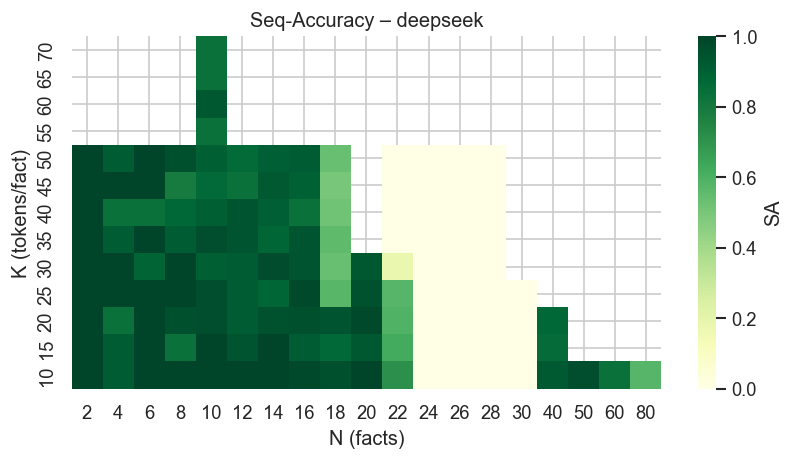

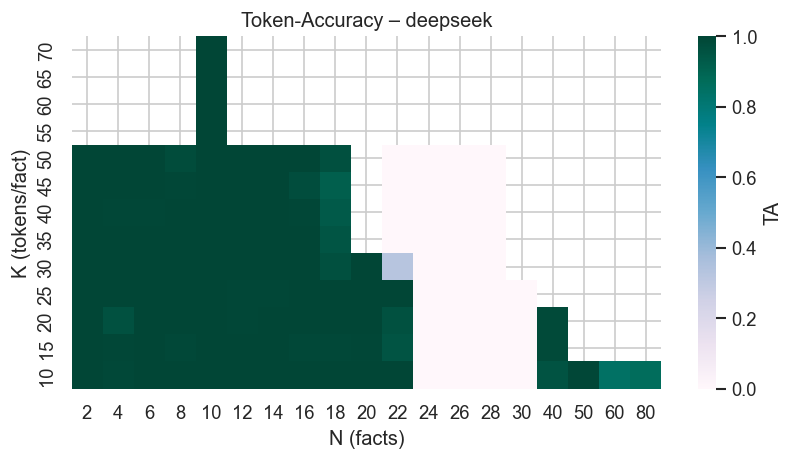

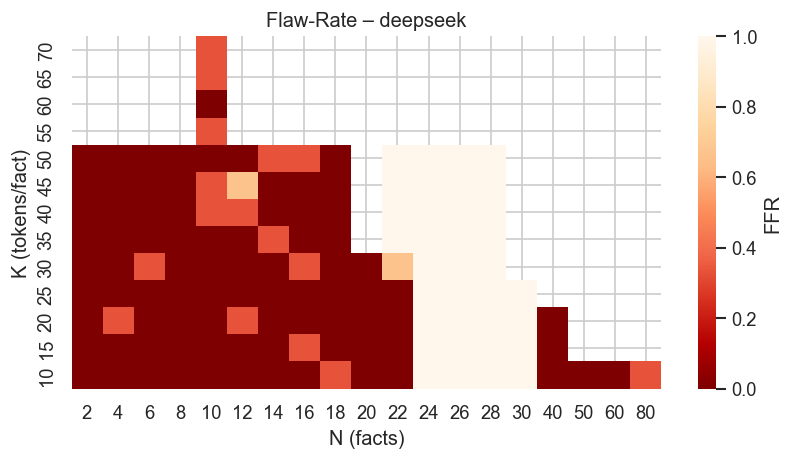

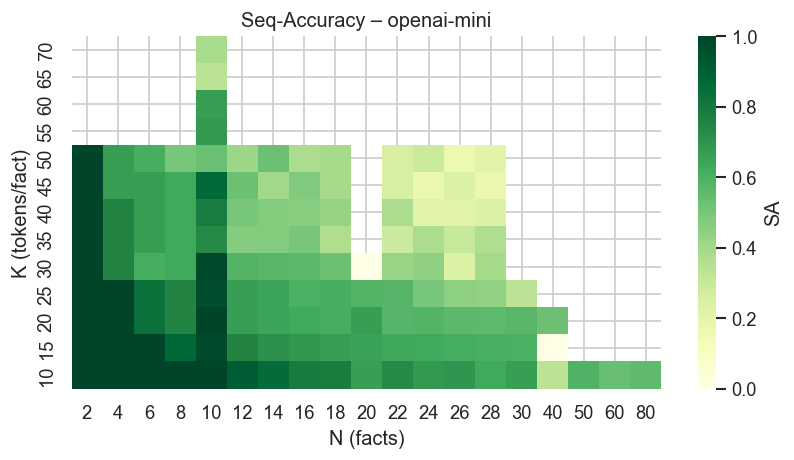

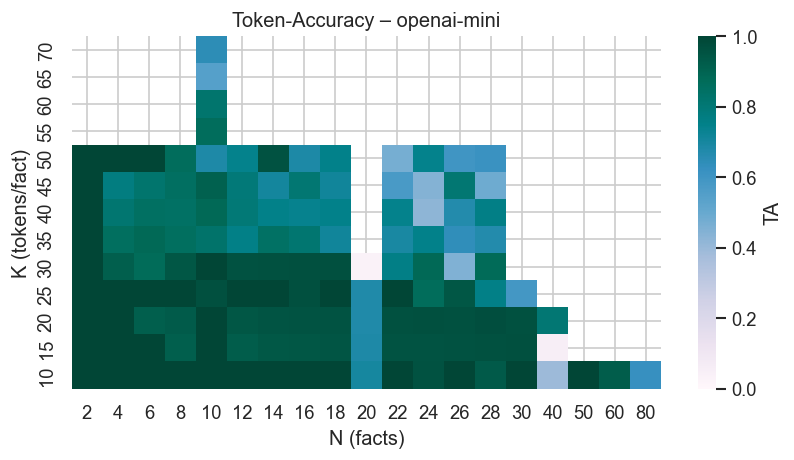

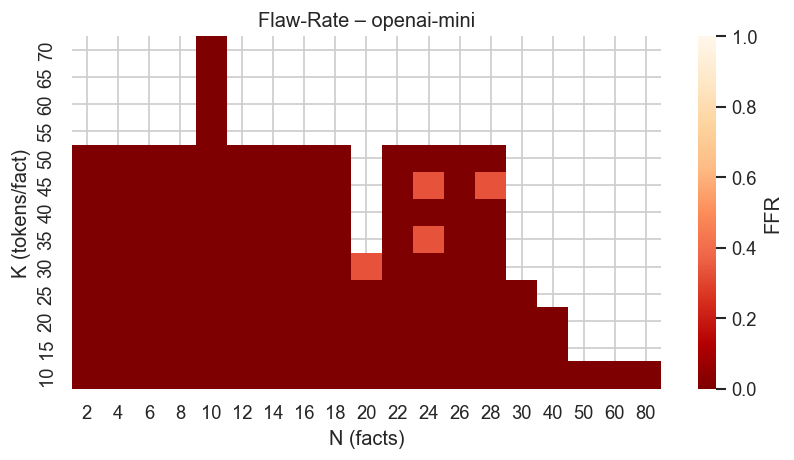

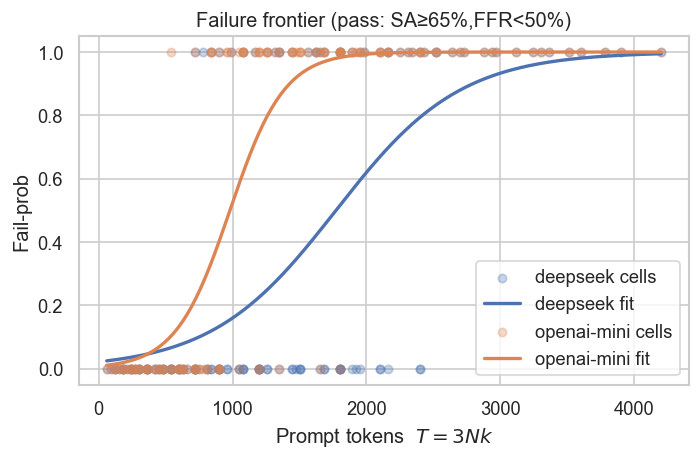

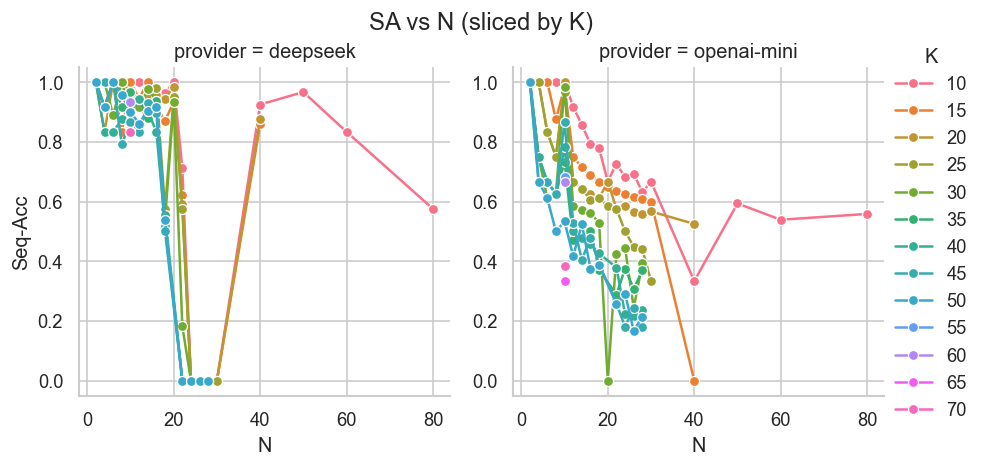

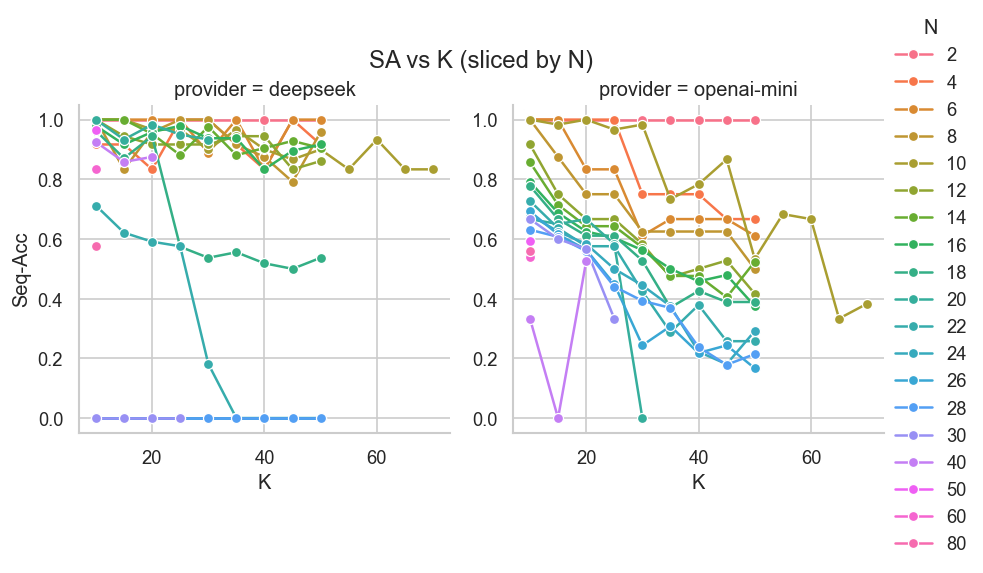

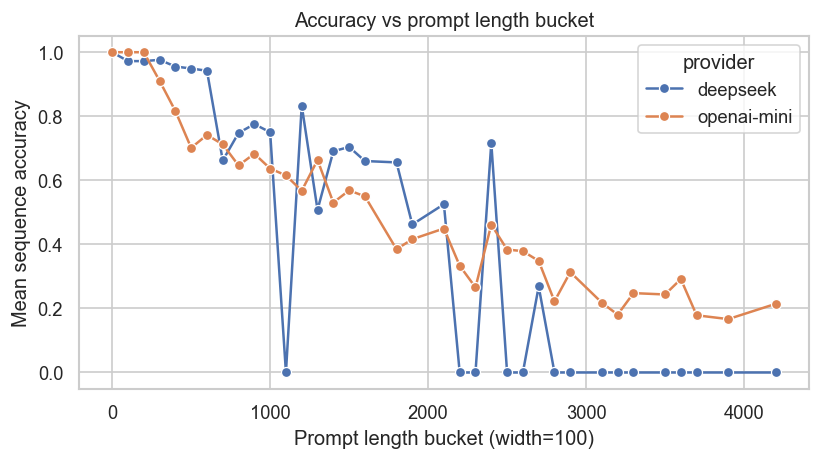

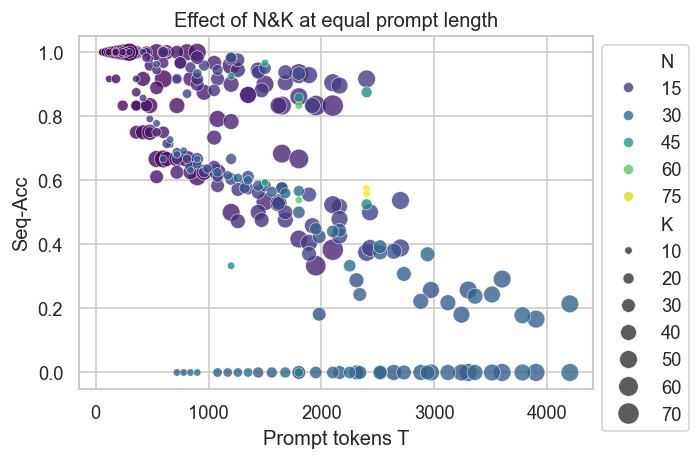

In [23]:
# ======================================================================
# 0. Imports & knobs
# ======================================================================
import json, re, itertools, pathlib
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set_theme(style="whitegrid"); plt.rcParams["figure.dpi"] = 120

# ---------------- USER-KNOBS ------------------------------------------
RESULT_DIRS = [                               # label, path
    ("openai-mini", pathlib.Path("results/prompt_default_prompt/openai")),
    ("deepseek",    pathlib.Path("results/dpprompt_default_prompt/deepseek")),
]
SA_PASS  = 0.65
FFR_THR  = 0.50
MATCH_ONLY_COMMON = True       # << new: keep only (N,K) present in ALL
TOKEN_BUCKET_WIDTH = 100         # bucket size for prompt-token plots
# ======================================================================



# ======================================================================
# 1. Trial loader
# ======================================================================
def parse_nk(stem):
    m = re.search(r"_([0-9]+)N_([0-9]+)K", stem, re.I)
    return (int(m[1]), int(m[2])) if m else (None, None)

def iter_trials(root, provider):
    for jf in root.rglob("*.json"):
        N,K = parse_nk(jf.stem)
        if N is None: continue
        try:
            blob = json.loads(jf.read_text())
            for t in blob["trials"]:
                yield dict(provider=provider, N=N, K=K,
                           SA=t["sequence_accuracy"],
                           TA=t["token_accuracy"],
                           FF=int(t["major_format_flaw"]),
                           exp_tok=t.get("expected_token_count", np.nan),
                           resp_tok=t.get("response_token_count", np.nan))
        except Exception as e:
            print("skip", jf, e)

df = pd.DataFrame(itertools.chain.from_iterable(
        iter_trials(p,l) for l,p in RESULT_DIRS))
assert not df.empty, "no data"

# -------------- keep only common experiments across providers ----------
if MATCH_ONLY_COMMON:
    def pairs(df, provider):
        return set(df.loc[df.provider == provider, ["N", "K"]]
                     .itertuples(index=False, name=None))
    common_pairs = set.intersection(*[pairs(df, lbl) for lbl, _ in RESULT_DIRS])
    mask = df.apply(lambda r: (r.N, r.K) in common_pairs, axis=1)
    df = df[mask]
    print(f"Common grid size: {len(common_pairs)} (N,K) cells")


# -------------- per-cell aggregate ------------------------------------
agg = (df.groupby(["provider","N","K"])
          .agg(SA=("SA","mean"),TA=("TA","mean"),
               FFR=("FF","mean"), n_trials=("SA","size"))
          .reset_index())
agg["T"] = 3*agg["N"]*agg["K"]
agg["pass"] = (agg["SA"]>=SA_PASS) & (agg["FFR"]<FFR_THR)
# ======================================================================



# ======================================================================
# 2. Heat-maps  (SA / TA / FFR)
# ======================================================================
def hm(metric, title, cmap):
    pivot = (sub.pivot(index="K", columns="N", values=metric)
                .sort_index().sort_index(axis=1))
    plt.figure(figsize=(7,4))
    sns.heatmap(pivot, cmap=cmap, vmin=0, vmax=1, cbar_kws={'label':metric})
    plt.title(title);             plt.xlabel("N (facts)")
    plt.ylabel("K (tokens/fact)"); plt.gca().invert_yaxis()  # low K bottom
    plt.tight_layout()

for prov, sub in agg.groupby("provider"):
    hm("SA",  f"Seq-Accuracy – {prov}", "YlGn")
    hm("TA",  f"Token-Accuracy – {prov}", "PuBuGn")
    hm("FFR", f"Flaw-Rate – {prov}", "OrRd_r")



# ======================================================================
# 3. Failure frontier vs prompt-length
# ======================================================================
plt.figure(figsize=(6,4))
for prov, sub in agg.groupby("provider"):
    X, y = sub[["T"]], (~sub["pass"]).astype(int)
    m = LogisticRegression(solver="lbfgs").fit(X,y)
    xx = np.linspace(X.min(), X.max(), 250).reshape(-1,1)
    plt.scatter(X, y, s=25, alpha=.3, label=f"{prov} cells")
    plt.plot(xx, m.predict_proba(xx)[:,1], lw=2,label=f"{prov} fit")
plt.xlabel("Prompt tokens  $T=3Nk$"); plt.ylabel("Fail-prob")
plt.title(f"Failure frontier (pass: SA≥{SA_PASS:.0%},FFR<{FFR_THR:.0%})")
plt.legend(); plt.tight_layout()



# ======================================================================
# 4. Trend slices   SA vs N (per-K)  and SA vs K (per-N)
# ======================================================================
def trend(var_fixed):
    var, lab = ("N","facts") if var_fixed=="K" else ("K","tokens/fact")
    g = sns.FacetGrid(agg, col="provider", hue=var_fixed,
                      height=3.8, sharey=False,
                      palette="husl", col_wrap=len(RESULT_DIRS))
    g.map_dataframe(sns.lineplot, x=var, y="SA", marker="o")
    g.add_legend(title=var_fixed); g.set_axis_labels(var,"Seq-Acc")
    g.fig.suptitle(f"SA vs {var} (sliced by {var_fixed})", y=1.02)
trend("K"); trend("N")



# ======================================================================
# 5. Same-token buckets  (do many short vs few long comparisons)
# ======================================================================
bucket = (agg
          .assign(T_bin=lambda d: (d["T"]//TOKEN_BUCKET_WIDTH)*TOKEN_BUCKET_WIDTH)
          .groupby(["provider","T_bin"])
          .agg(SA=("SA","mean"), TA=("TA","mean"),
               FFR=("FFR","mean"), cells=("SA","size"))
          .reset_index())

plt.figure(figsize=(7,4))
sns.lineplot(data=bucket, x="T_bin", y="SA", hue="provider", marker="o")
plt.xlabel(f"Prompt length bucket (width={TOKEN_BUCKET_WIDTH})")
plt.ylabel("Mean sequence accuracy"); plt.title("Accuracy vs prompt length bucket")
plt.tight_layout()

# ---- scatter with marker size encoding K or N --------------
plt.figure(figsize=(6,4))
sns.scatterplot(data=agg, x="T", y="SA", hue="N",
                size="K", sizes=(20,160), palette="viridis", alpha=.8)
plt.xlabel("Prompt tokens T"); plt.ylabel("Seq-Acc")
plt.title("Effect of N&K at equal prompt length")
plt.legend(bbox_to_anchor=(1,1)); plt.tight_layout()
